# **Evaluation Techniques for Regression Models**

In [28]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### **Lineear regression Model**

**Linear regression** is a statistical method for modeling the relationship between a dependent variable and one or more independent variables.

## **Key Formulas**

- **Simple Linear Regression**:  
  The relationship is modeled as:  
  $$
  y = \beta_0 + \beta_1 x + \epsilon
  $$  
  where:  
  - **$y$**: Dependent variable.  
  - **$\beta_0$**: Y-intercept of the line.  
  - **$\beta_1$**: Slope of the line.  
  - **$x$**: Independent variable.  
  - **$\epsilon$**: Error term.  

- **Multiple Linear Regression**:  
  The relationship is modeled as:  
  $$
  y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon
  $$  
  where:  
  - **$y$**: Dependent variable.  
  - **$\beta_0$**: Y-intercept.  
  - **$\beta_1, \beta_2, \ldots, \beta_p$**: Coefficients for the independent variables.  
  - **$x_1, x_2, \ldots, x_p$**: Independent variables.  
  - **$\epsilon$**: Error term.


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error



In [30]:
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [31]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
if X.isnull().sum().sum() > 0:
    X = X.fillna(X.mean())

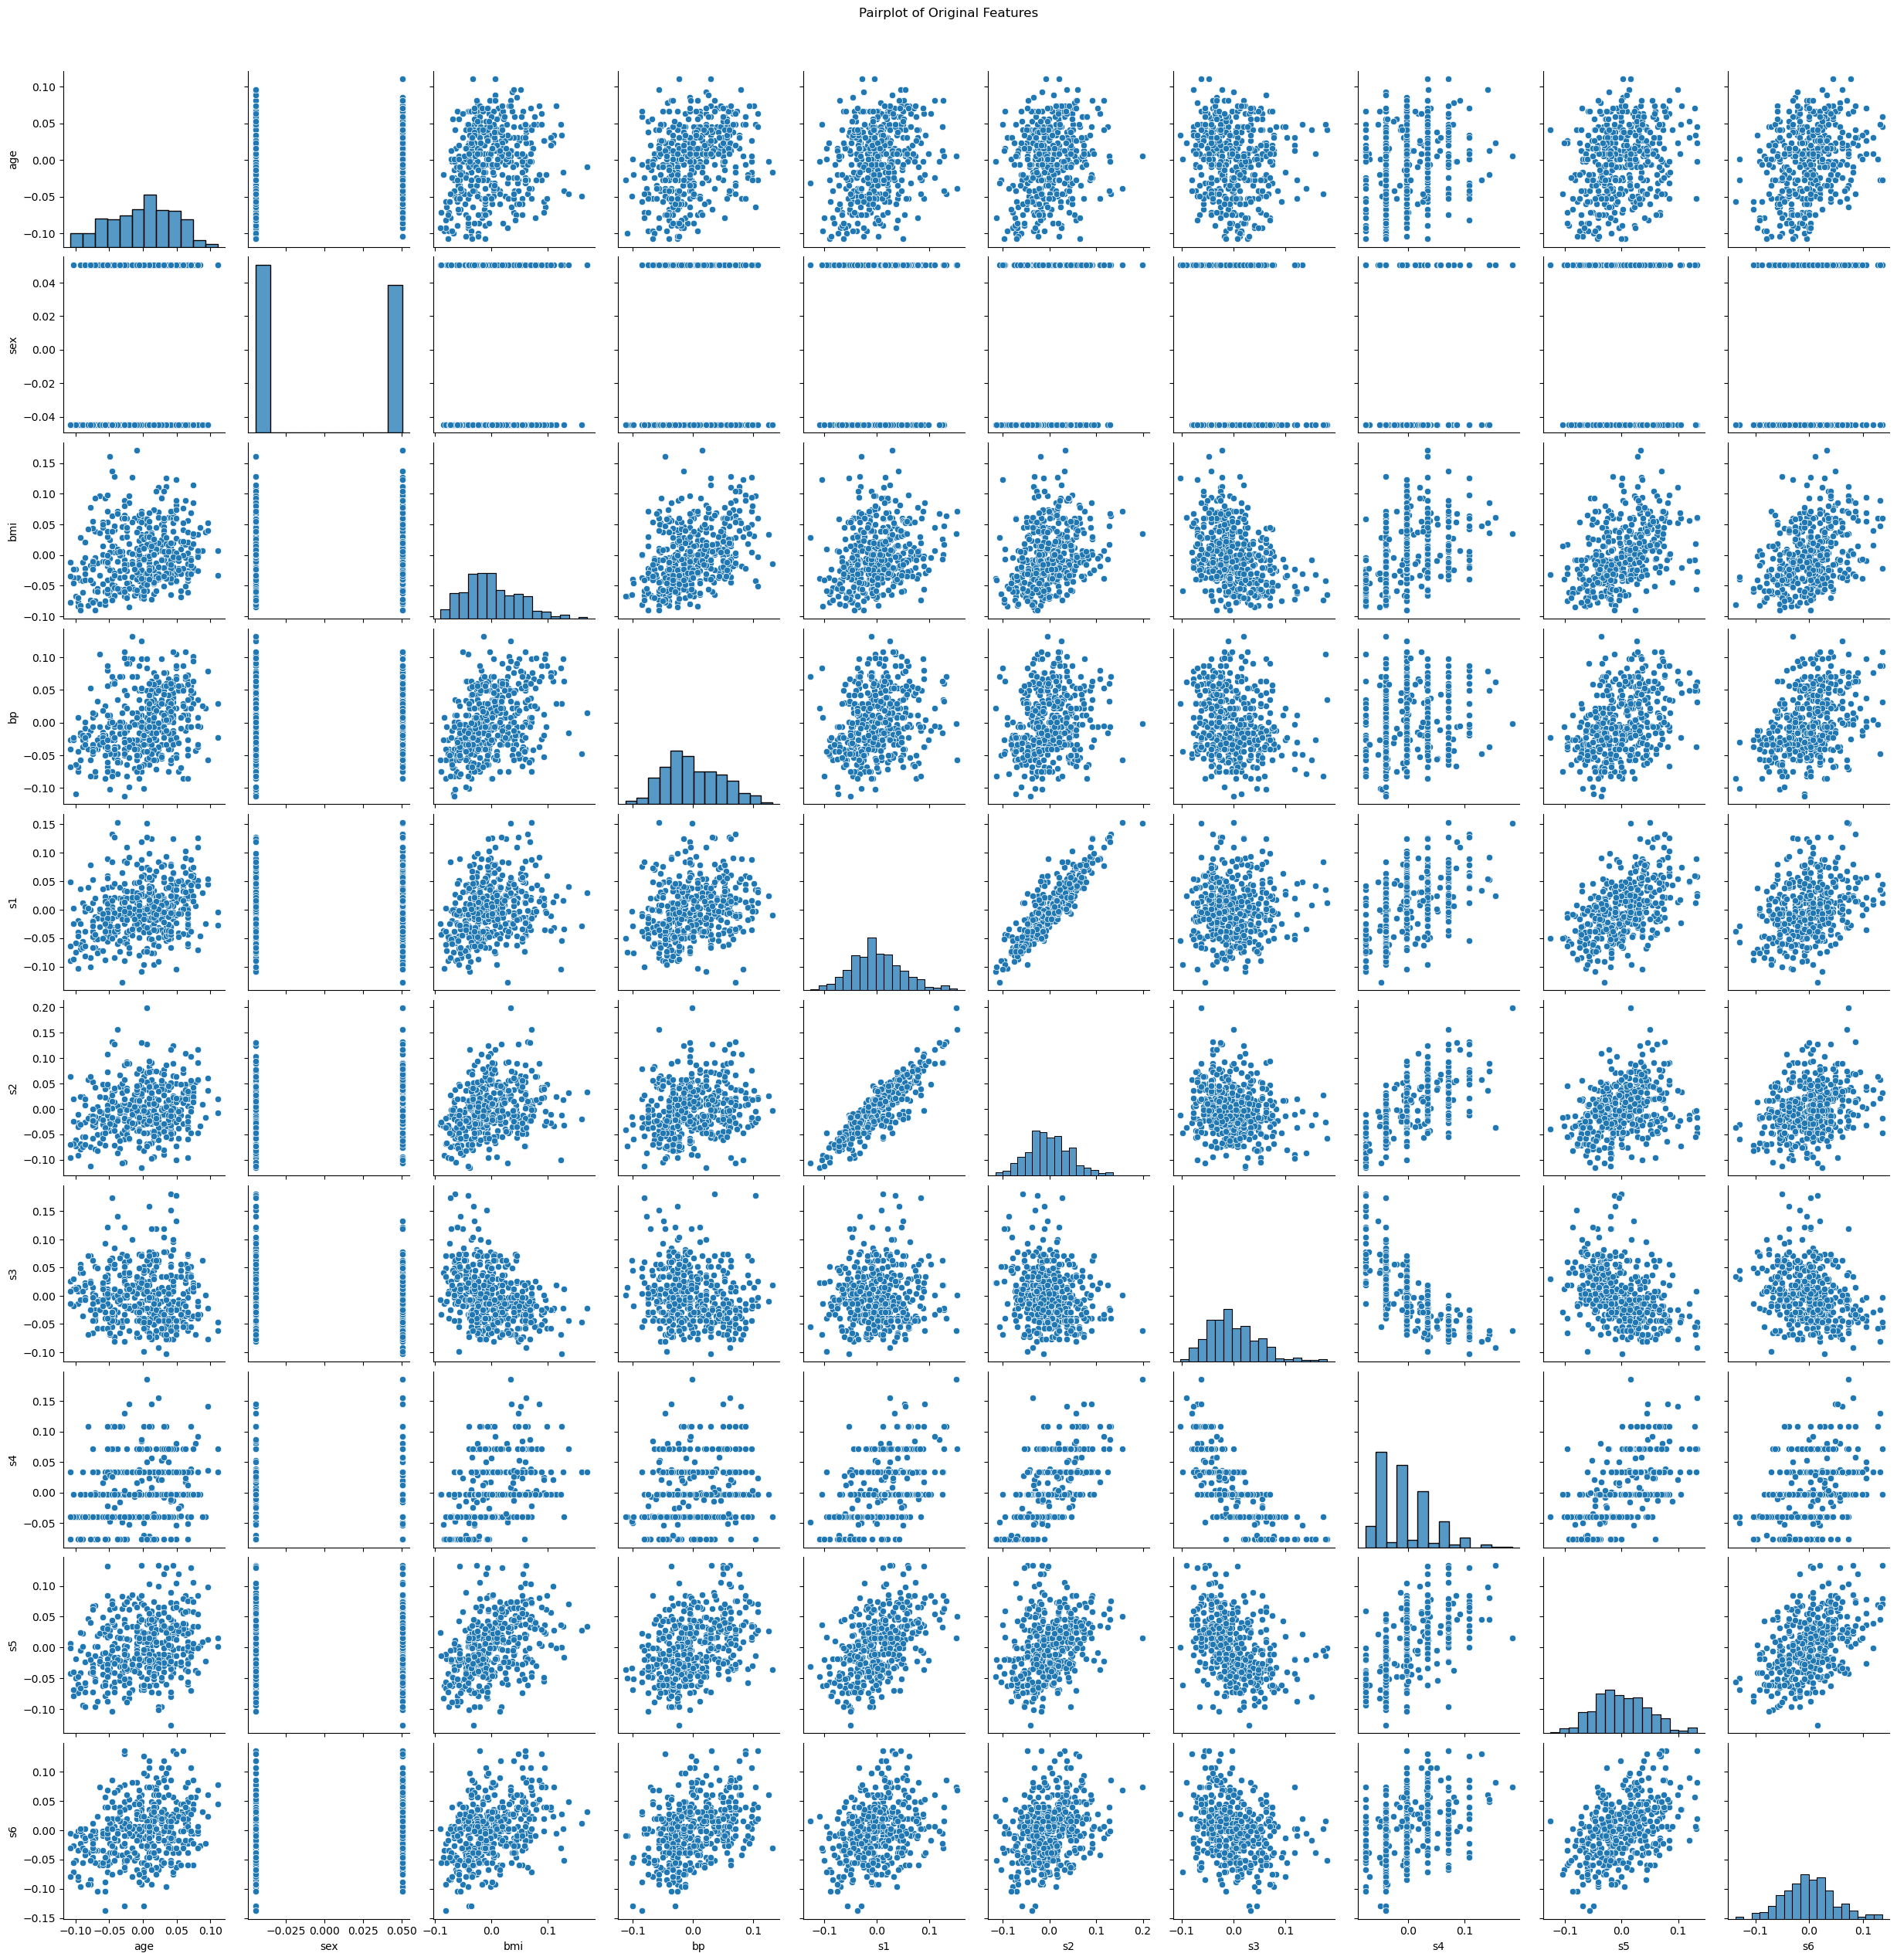

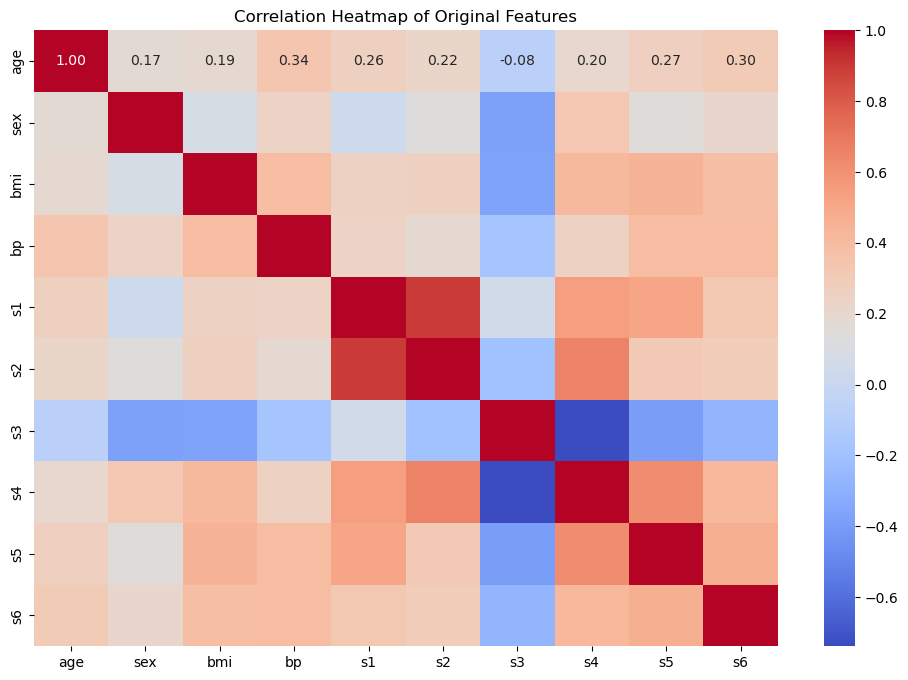

In [32]:
sns.pairplot(X)
plt.suptitle('Pairplot of Original Features', y=1.02)
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Original Features')
plt.show()

In [33]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out())

In [34]:
ridge = Ridge()
rfe = RFE(ridge, n_features_to_select=10, step=1)
rfe.fit(X_poly_df, y)

RFE(estimator=Ridge(), n_features_to_select=10)

In [35]:
X_rfe = X_poly_df.iloc[:, rfe.support_]

In [36]:
X_rfe_df = X_rfe.copy()
X_rfe_df['target'] = y

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe_df.drop('target', axis=1), X_rfe_df['target'], test_size=0.2, random_state=42)

In [38]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Evaluation Tecniques**

### **Mean Absolute Error (MAE)**

**Definition:** The Mean Absolute Error (MAE) measures the average magnitude of errors between predicted values and actual values, without considering their direction. It provides a straightforward measure of prediction accuracy.

**Formula:**

For block equations:
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|
$$

For inline equations:
The Mean Absolute Error (MAE) can be calculated using the formula $\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|$.

**Parameters:**
- **$y_i$**: Actual value of the $i$-th observation.
- **$\hat{y_i}$**: Predicted value of the $i$-th observation.
- **$n$**: Total number of observations.

**Range:** [0, ∞]  
Where 0 indicates no error and higher values indicate larger errors. MAE provides a clear measure of prediction error but does not differentiate between small and large errors beyond their magnitude.


In [39]:
from sklearn.metrics import mean_absolute_error

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_y_pred = linear_reg.predict(X_test_scaled)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_y_pred)
print("Linear Regression Mean Absolute Error:", linear_reg_mae)

Linear Regression Mean Absolute Error: 42.98222014408134


### **Mean Squared Error (MSE)**

**Definition:** The Mean Squared Error (MSE) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. It gives an idea of how much the model's predictions deviate from the actual values.

**Formula:**

For block equations:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

For inline equations:
The Mean Squared Error (MSE) can be calculated using the formula $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$.

**Parameters:**
- **$y_i$**: Actual value of the $i$-th observation.
- **$\hat{y_i}$**: Predicted value of the $i$-th observation.
- **$n$**: Total number of observations.

**Range:** [0, ∞]  
Where 0 indicates no error and higher values indicate larger errors. MSE penalizes larger errors more than smaller ones because of the squaring operation, making it sensitive to outliers.


In [40]:
from sklearn.metrics import mean_squared_error

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_y_pred = linear_reg.predict(X_test_scaled)
linear_reg_mse = mean_squared_error(y_test, linear_reg_y_pred)
print("Linear Regression Mean Squared Error:", linear_reg_mse)

Linear Regression Mean Squared Error: 2866.162241199841


### **Root Mean Squared Error (RMSE)**

**Definition:** The Root Mean Squared Error (RMSE) is the square root of the Mean Squared Error (MSE). It provides a measure of the average magnitude of errors in the units of the target variable. RMSE is useful for interpreting errors in the same unit as the target variable.

**Formula:**

For block equations:
$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2}
$$

For inline equations:
The Root Mean Squared Error (RMSE) can be calculated using the formula $\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2}$.

**Parameters:**
- **$y_i$**: Actual value of the $i$-th observation.
- **$\hat{y_i}$**: Predicted value of the $i$-th observation.
- **$n$**: Total number of observations.
- **MSE**: Mean Squared Error, which is the average of the squared differences between predicted and actual values.

**Range:** [0, ∞]  
Where 0 indicates no error and higher values indicate larger errors. RMSE provides a measure of the average magnitude of errors in the same units as the target variable, which makes it easier to interpret compared to MSE.


In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_y_pred = linear_reg.predict(X_test_scaled)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_y_pred))
print("Linear Regression Root Mean Squared Error:", linear_reg_rmse)

Linear Regression Root Mean Squared Error: 53.536550516444755


### **R-squared (Coefficient of Determination)**

**Definition:** The R-squared value represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It provides a measure of how well the model fits the data.

**Formula:**

For block equations:
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

For inline equations:
The R-squared (Coefficient of Determination) can be calculated using the formula $R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$.

**Parameters:**
- **$y_i$**: Actual value of the $i$-th observation.
- **$\hat{y_i}$**: Predicted value of the $i$-th observation.
- **$\bar{y}$**: Mean of the actual values.
- **$n$**: Total number of observations.

**Range:** [-∞, 1]  
Where 1 indicates a perfect fit, meaning the model explains all the variability in the data, and values close to 0 suggest that the model does not explain much of the variability. Negative values can occur if the model is worse than a simple mean model.


In [42]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_r2 = linear_reg.score(X_test_scaled, y_test)
print("Linear Regression R-squared (R²):", linear_reg_r2)

Linear Regression R-squared (R²): 0.45902601940340404


### **Mean Absolute Percentage Error (MAPE)**

**Definition:** The Mean Absolute Percentage Error (MAPE) measures the average absolute percentage error between the predicted values and the actual values. It provides an understanding of how much predictions deviate from actual values in percentage terms.

**Formula:**

For block equations:
$$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y_i}}{y_i} \right| \times 100
$$

For inline equations:
The Mean Absolute Percentage Error (MAPE) can be calculated using the formula $\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y_i}}{y_i} \right| \times 100$.

**Parameters:**
- **$y_i$**: Actual value of the $i$-th observation.
- **$\hat{y_i}$**: Predicted value of the $i$-th observation.
- **$n$**: Total number of observations.

**Range:** [0, ∞]  
Where 0 indicates perfect accuracy and higher values indicate larger errors. MAPE is expressed as a percentage, making it easier to interpret in terms of relative error. However, it can be undefined if any actual values are zero.


In [43]:
from sklearn.metrics import mean_absolute_percentage_error

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_y_pred = linear_reg.predict(X_test_scaled)
linear_reg_mape = mean_absolute_percentage_error(y_test, linear_reg_y_pred)
print("Linear Regression Mean Absolute Percentage Error (MAPE):", linear_reg_mape)

Linear Regression Mean Absolute Percentage Error (MAPE): 0.3718286295170563


### **Median Absolute Error**

**Definition:** The Median Absolute Error (MedAE) is the median of the absolute differences between predicted values and actual values. It provides a robust measure of prediction error that is less sensitive to outliers compared to the Mean Absolute Error (MAE).

**Formula:**

For block equations:
$$
\text{MedAE} = \text{median} \left( |y_i - \hat{y_i}| \right)
$$

For inline equations:
The Median Absolute Error (MedAE) can be calculated using the formula $\text{MedAE} = \text{median} \left( |y_i - \hat{y_i}| \right)$.

**Parameters:**
- **$y_i$**: Actual value of the $i$-th observation.
- **$\hat{y_i}$**: Predicted value of the $i$-th observation.

**Range:** [0, ∞]  
Where 0 indicates no error and higher values indicate larger errors. The Median Absolute Error provides a measure of the typical magnitude of errors in predictions, with robustness against outliers due to its median calculation.


In [44]:
from sklearn.metrics import median_absolute_error

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_y_pred = linear_reg.predict(X_test_scaled)
linear_reg_median_absolute_error = median_absolute_error(y_test, linear_reg_y_pred)
print("Linear Regression Median Absolute Error:", linear_reg_median_absolute_error)

Linear Regression Median Absolute Error: 37.1606470598696
